In [41]:
import numpy as np
import qiskit.quantum_info
from sympy import *
from sympy.solvers import solve
import random
from qiskit import *
from qiskit import IBMQ
import pylatexenc
import scipy as sp
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy import linalg as sla
from IPython.display import clear_output
from numpy import linalg as la
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit import Parameter
from qiskit.compiler import transpile, assemble
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.visualization import *
from operator import itemgetter
from functools import reduce

In [42]:
file = open("key.txt", "r")
key = file.read()
IBMQ.save_account(key)
IBMQ.load_account()
provider = IBMQ.get_provider()

print(provider.backends())

backend = provider.get_backend('ibmq_qasm_simulator')

eTarget = -2

configrc.store_credentials:WARNING:2021-09-16 08:13:59,830: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-09-16 08:14:00,465: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') fro

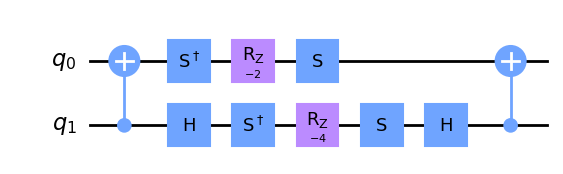

In [56]:
#TODO: turn off z terms

def make_cont_sys_circ(inTime):
    time = Parameter('time')

    temp = QuantumCircuit(2)

    temp.cx(1, 0)
    temp.h(1)
    temp.sdg(0)
    temp.sdg(1)

    temp.rz(-2 * time, 0)
    temp.rz(-4 * time, 1)

    temp.s(0)
    temp.s(1)
    temp.h(1)
    temp.cx(1, 0)

    tempGate = temp.to_gate({time: inTime}, "sys: " + str(inTime))

    contTemp = tempGate.control(1)

    return contTemp

temp = QuantumCircuit(2)

temp.cx(1, 0)
temp.h(1)
temp.sdg(0)
temp.sdg(1)

temp.rz(-2 * 1, 0)
temp.rz(-4 * 1, 1)

temp.s(0)
temp.s(1)
temp.h(1)
temp.cx(1, 0)

temp.draw('mpl')

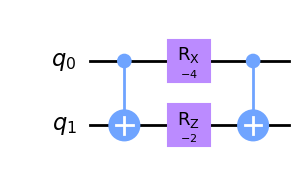

In [51]:
def make_cont_sys_circ2(inTime):
    time = Parameter('time')

    temp = QuantumCircuit(2)

    temp.cx(0, 1)

    temp.rx(-4 * time, 0)
    temp.rz(-2 * time, 1)

    temp.cx(0, 1)


    tempGate = temp.to_gate({time: inTime}, "sys: " + str(inTime))

    contTemp = tempGate.control(1)

    return contTemp

temp = QuantumCircuit(2)

temp.cx(0, 1)

temp.rx(-4 * 1, 0)
temp.rz(-2 * 1, 1)

temp.cx(0, 1)

temp.draw('mpl')

<ipython-input-6-f74779fc334a>:6: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  rodeo.u1(1*eTarget, 0)


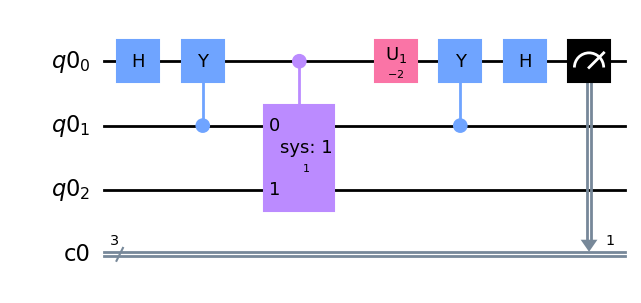

In [6]:
rodeo = QuantumCircuit(QuantumRegister(3), ClassicalRegister(3))

rodeo.h(0)
rodeo.cy(0, 1)
rodeo.append(make_cont_sys_circ(1), [0, 1, 2])
rodeo.u1(1*eTarget, 0)
rodeo.cy(0, 1)
rodeo.h(0)
rodeo.measure(0, 1)

rodeo.draw('mpl')

In [33]:
t1 = np.random.normal(0, 5)
t2 = np.random.normal(0, 5)
t3 = np.random.normal(0, 5)
t4 = np.random.normal(0, 5)
t5 = np.random.normal(0, 5)

t1
t2
t3
t4
t5

-2.5549346467283263

In [34]:
#low overlap -- maybe find a way to guarantee this?
# t1 = -3.874444506605847
# t2 = -1.898967104374589
# t3 = 1.2839649933026793
# t4 = 4

# times used
# t1 = -7.682971153779546
# t2 = -5.374032720012178
# t3 = 1.1135803511904725

print(t1)
print(t2)
print(t3)
print(t4)
print(t5)


-5.470948191213905
-4.892483972497733
-5.8093272373236715
-1.9687749131091463
-2.5549346467283263


-3.0: 
518
{'00000': 518, '00001': 1, '10001': 7, '10011': 137, '10101': 18, '10111': 71, '11001': 4, '11011': 14, '11101': 4, '11111': 12, '00011': 20, '00101': 3, '00111': 8, '01001': 5, '01011': 123, '01100': 1, '01101': 19, '01111': 59}
-1.0: 
3
{'00000': 3, '00001': 52, '10001': 18, '10010': 5, '10100': 1, '10101': 32, '10110': 93, '10111': 4, '11000': 9, '11001': 230, '11010': 56, '11101': 11, '11110': 34, '00010': 5, '00011': 1, '00100': 2, '00101': 68, '00110': 223, '00111': 10, '01000': 5, '01001': 113, '01010': 21, '01011': 1, '01101': 5, '01110': 22}
1.0: 
525
{'00000': 525, '00001': 1, '10001': 7, '10011': 125, '10101': 18, '10111': 54, '11001': 1, '11011': 21, '11101': 3, '11111': 9, '00011': 24, '00101': 1, '00111': 10, '01001': 5, '01011': 134, '01100': 1, '01101': 26, '01111': 59}
3.0: 
0
{'00001': 27, '10000': 1, '10001': 14, '10010': 180, '10011': 27, '10100': 15, '10101': 36, '10110': 48, '10111': 1, '11000': 5, '11001': 125, '11010': 33, '11011': 3, '11100': 3, '111

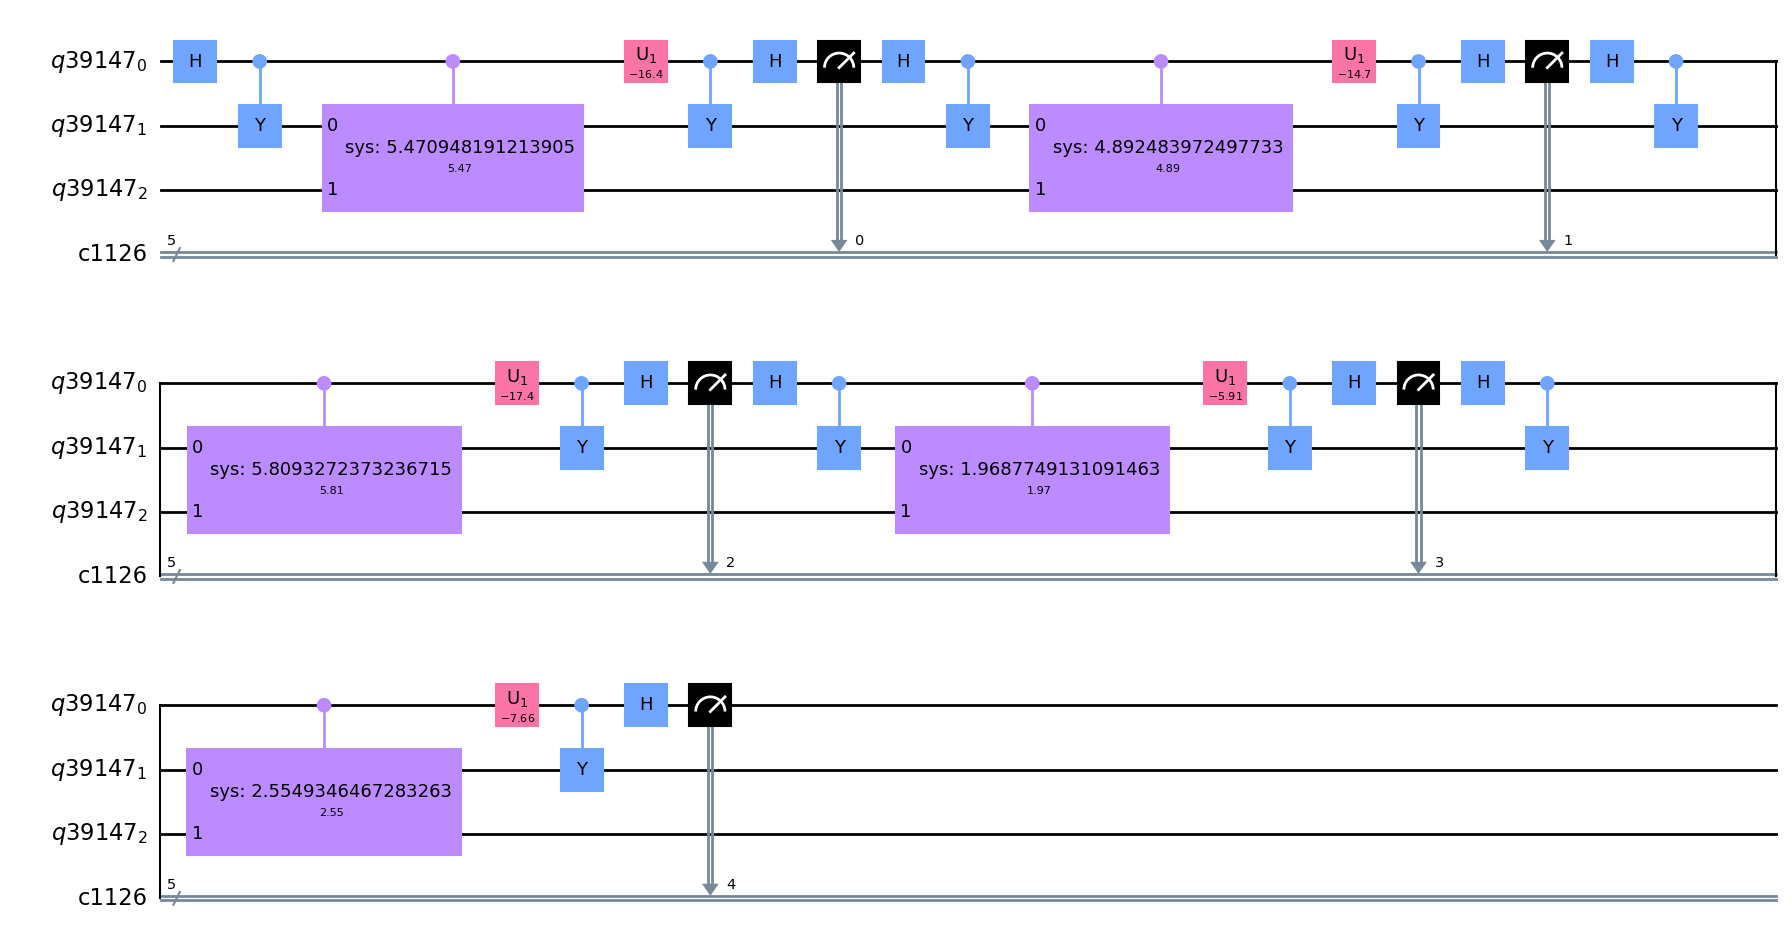

In [57]:
specSuccess4 = list()
specAll4 = list()

# initial_state = [1/sqrt(2), 0, 0, -1/sqrt(2), 0, 0, 0,0]
# initial_vector = qiskit.quantum_info.Statevector(initial_state)

# 000
# 001
# 010
# 011
# 100
# 101
# 110
# 111

#start with np.linspace to get few (~10) evenly sized bins
#use small times to search
#repeat search on peaks with larger times

for i in Range(4):
    eTarget = -3 + (i) * 2
    # eTarget = i/100 - 5

    # eTarget = -3

    eTarget = float(eTarget)
    print(str(eTarget) + ": ")

    rodeo = QuantumCircuit(QuantumRegister(3), ClassicalRegister(5))

    #rodeo.initialize(initial_vector)
    #rodeo.h(1)
    #rodeo.x(1)


    rodeo.h(0)
    rodeo.cy(0, 1)
    rodeo.append(make_cont_sys_circ(-t1), [0, 1, 2])
    rodeo.u1(eTarget * t1, 0)
    rodeo.cy(0, 1)
    rodeo.h(0)
    rodeo.measure(0, 0) #cbit 000n

    rodeo.h(0)
    rodeo.cy(0, 1)
    rodeo.append(make_cont_sys_circ(-t2), [0, 1, 2])
    rodeo.u1(eTarget * t2, 0)
    rodeo.cy(0, 1)
    rodeo.h(0)
    rodeo.measure(0, 1) #cbit 00n0

    rodeo.h(0)
    rodeo.cy(0, 1)
    rodeo.append(make_cont_sys_circ(-t3), [0, 1, 2])
    rodeo.u1(eTarget * t3, 0)
    rodeo.cy(0, 1)
    rodeo.h(0)
    rodeo.measure(0, 2) #cbit 0n00

    rodeo.h(0)
    rodeo.cy(0, 1)
    rodeo.append(make_cont_sys_circ(-t4), [0, 1, 2])
    rodeo.u1(eTarget * t4, 0)
    rodeo.cy(0, 1)
    rodeo.h(0)
    rodeo.measure(0, 3) #cbit n000

    rodeo.h(0)
    rodeo.cy(0, 1)
    rodeo.append(make_cont_sys_circ(-t5), [0, 1, 2])
    rodeo.u1(eTarget * t5, 0)
    rodeo.cy(0, 1)
    rodeo.h(0)
    rodeo.measure(0, 4) #cbit n0000

    job = execute(rodeo, backend=backend)
    job.wait_for_final_state()

    numSuccess = job.result().get_counts().get('00000')
    if numSuccess is None:
        numSuccess = 0

    print(numSuccess)
    specSuccess4.append(numSuccess)

    print(job.result().get_counts())

rodeo.draw('mpl')


In [ ]:
specSuccess4 = list()
specAll4 = list()

# 000
# 001
# 010
# 011
# 100
# 101
# 110
# 111

for i in Range(100):
    # eTarget = -6 + (i) * 2
    eTarget = i/10 - 5

    # eTarget = -6

    eTarget = float(eTarget)
    print(str(eTarget) + ": ")

    rodeo = QuantumCircuit(QuantumRegister(5), ClassicalRegister(4))

    #rodeo.h(1)
    #rodeo.cx(1, 2)

    #rodeo.measure(0, 0)

    rodeo.h(0)
    rodeo.cy(3, 0)
    rodeo.append(make_cont_sys_circ2(-t1), [0, 3, 4])
    rodeo.u1(eTarget * t1, 0)
    rodeo.cy(3, 0)
    rodeo.h(0)
    rodeo.measure(0, 0) #cbit 000n

    rodeo.h(1)
    rodeo.cy(3, 1)
    rodeo.append(make_cont_sys_circ2(-t2), [1, 3, 4])
    rodeo.u1(eTarget * t2, 1)
    rodeo.cy(3, 1)
    rodeo.h(1)
    rodeo.measure(1, 1) #cbit 00n0

    rodeo.h(2)
    # rodeo.cy(3, 2)
    rodeo.append(make_cont_sys_circ2(-t3), [2, 3, 4])
    rodeo.u1(eTarget * t3, 2)
    # rodeo.cy(3, 2)
    rodeo.h(2)
    rodeo.measure(2, 2) #cbit 0n00

    rodeo.h(0)
    rodeo.cy(0, 1)
    rodeo.append(make_cont_sys_circ2(-t4), [0, 1, 2])
    rodeo.u1(eTarget * t4, 0)
    rodeo.cy(0, 1)
    rodeo.h(0)
    rodeo.measure(0, 3) #cbit n000

    job = execute(rodeo, backend=backend)
    job.wait_for_final_state()

    numSuccess = job.result().get_counts().get('0000')
    if numSuccess is None:
        numSuccess = 0

    print(numSuccess)
    specSuccess4.append(numSuccess)

    print(job.result().get_counts())

rodeo.draw('mpl')

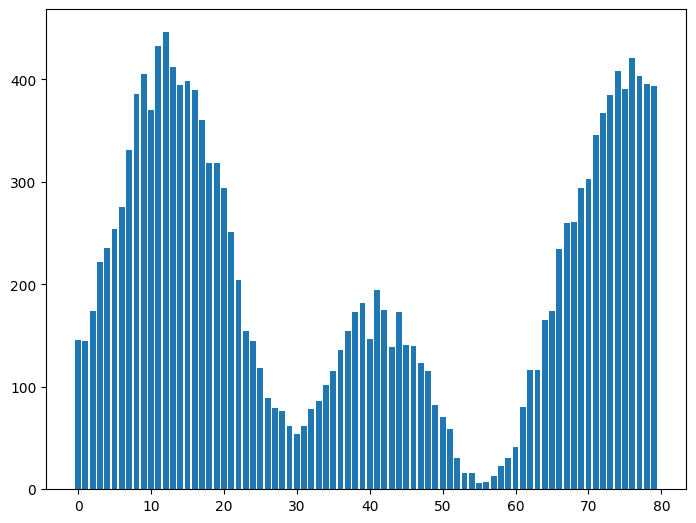

In [72]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# range = Range(80)
# ax.bar(range, specSuccess)
# plt.show()

In [10]:
print(job.result().get_counts())

{'0000': 81, '0001': 13, '0010': 86, '0011': 51, '0100': 35, '0101': 59, '0110': 82, '0111': 43, '1000': 24, '1001': 256, '1010': 29, '1011': 7, '1100': 195, '1101': 16, '1110': 28, '1111': 19}


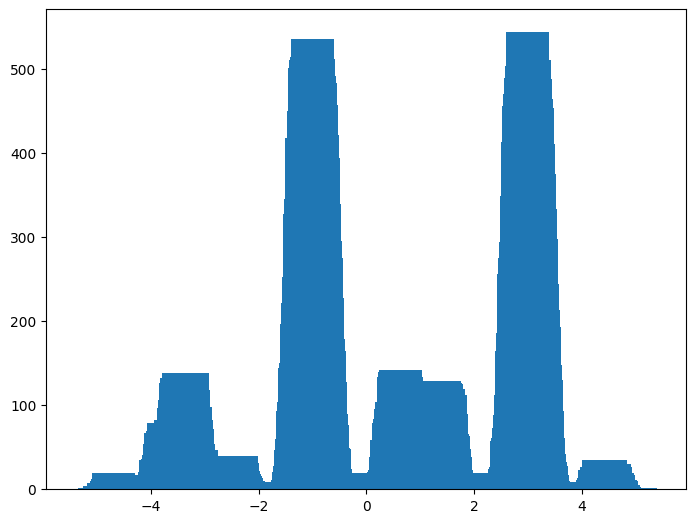

In [39]:
def make_x_axis(x):
    return x/100 - 5

range_x_axis = np.vectorize(make_x_axis)

fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
range2 = range_x_axis(Range(1000))
ax2.bar(range2, specSuccess4)
plt.show()

